## ECT test data generation
### Sarah McGuire September 2023

In [2]:
import importlib
import time

import numpy as np
import pandas as pd
import math

import scipy.ndimage as ndimage
import scipy.spatial.distance as distance

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import IPython.display as display

# To import/export TIFF files
from PIL import Image
import tifffile as tf

In [3]:
import seaborn as sns

In [4]:
import networkx as nx

### Save the ectMatrix as a tiff file

In [5]:
#normalize the matrix
#ectMatrix_norm = (255*(ectMatrix - np.min(ectMatrix))/np.ptp(ectMatrix)).astype(int)

In [6]:
#im = Image.fromarray(ectMatrix_norm)
#im.save('test_ect.tif')

# Passiflora data, ECT computation

In [7]:
# read text file into pandas DataFrame and
# create header
df = pd.read_csv("../data/AllLeaf_coordinates/Ivy/03.Scale_xy/Vine1_2.txt", names=['X','Y'])

In [8]:
# display DataFrame
print(df)

           X         Y
0    -1.2375  0.072387
1    -1.2375  0.068705
2    -1.2375  0.065023
3    -1.2375  0.061340
4    -1.2375  0.057658
...      ...       ...
1817 -1.2339  0.087116
1818 -1.2339  0.083434
1819 -1.2339  0.079751
1820 -1.2339  0.076069
1821 -1.2375  0.072387

[1822 rows x 2 columns]


Scatter Plot:  


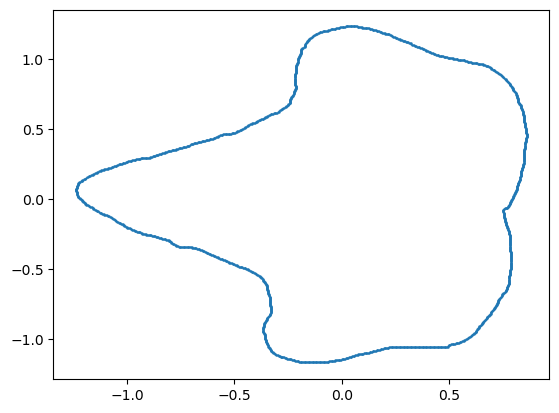

In [8]:
print("Scatter Plot:  ")
plt.scatter(df['X'], df['Y'],s=0.5)
plt.show()

In [9]:
df0 = pd.read_csv("../data/0.procrustes_landmarks.txt", sep='	')

In [10]:
df0

,plant,species,ontogeny,total,heteroblasty,x1,y1,x2,y2,x3,...,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15
0,Pact1,actinia,1,17,17,1.939415,414.812913,-7.047279,385.719915,28.429685,...,-108.831734,-1510.662028,563.252807,-424.176777,570.669793,-326.497673,405.345149,249.386171,381.749535,279.209462
1,Pact1,actinia,2,17,16,-27.972095,433.154746,-27.127051,417.953521,-17.138482,...,28.713845,-1468.443026,525.022693,-425.378430,538.426886,-343.900676,489.936964,124.340189,467.627131,173.870135
2,Pact1,actinia,3,17,15,-43.242816,430.053913,-39.277936,409.976781,-34.239161,...,120.698695,-1462.301694,546.694706,-517.910591,557.727421,-406.283139,488.911001,155.339518,460.348932,210.137903
3,Pact1,actinia,4,17,14,-36.082509,416.832663,-30.527203,394.236217,-19.829324,...,-58.899860,-1385.313503,535.019483,-519.980964,617.977373,-346.868643,517.511348,207.452944,483.026127,261.141674
4,Pact1,actinia,5,17,13,-7.724386,362.852233,-18.024917,347.266408,-16.965580,...,82.426785,-1493.947554,572.248040,-473.575088,591.964194,-391.158971,440.811250,275.545461,392.206108,308.648330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,Pvil4,villosa,11,15,5,-51.331021,420.897609,-55.305768,388.385209,-45.611783,...,130.124184,-1485.210263,409.688438,-311.352695,675.987867,-321.177712,582.575899,24.947354,493.974586,122.090915
3315,Pvil4,villosa,12,15,4,-4.989310,432.492522,-8.787673,398.014336,-16.676518,...,59.747144,-1553.569641,359.967458,-359.445517,607.645365,-328.570411,546.577034,120.181427,497.294356,253.565107
3316,Pvil4,villosa,13,15,3,-31.341076,430.493444,-25.402076,397.714052,-19.478544,...,57.290676,-1369.688148,425.223291,-372.766230,690.721379,-408.893290,631.858432,113.943003,537.375155,222.137872
3317,Pvil4,villosa,14,15,2,-89.515227,448.047436,-84.290862,425.561181,-76.959875,...,117.724363,-1288.360253,549.026568,-487.556298,701.626183,-359.151439,646.776978,17.248583,566.735143,170.679760


In [11]:
df0.head()

,plant,species,ontogeny,total,heteroblasty,x1,y1,x2,y2,x3,...,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15
0,Pact1,actinia,1,17,17,1.939415,414.812913,-7.047279,385.719915,28.429685,...,-108.831734,-1510.662028,563.252807,-424.176777,570.669793,-326.497673,405.345149,249.386171,381.749535,279.209462
1,Pact1,actinia,2,17,16,-27.972095,433.154746,-27.127051,417.953521,-17.138482,...,28.713845,-1468.443026,525.022693,-425.378430,538.426886,-343.900676,489.936964,124.340189,467.627131,173.870135
2,Pact1,actinia,3,17,15,-43.242816,430.053913,-39.277936,409.976781,-34.239161,...,120.698695,-1462.301694,546.694706,-517.910591,557.727421,-406.283139,488.911001,155.339518,460.348932,210.137903
3,Pact1,actinia,4,17,14,-36.082509,416.832663,-30.527203,394.236217,-19.829324,...,-58.899860,-1385.313503,535.019483,-519.980964,617.977373,-346.868643,517.511348,207.452944,483.026127,261.141674
4,Pact1,actinia,5,17,13,-7.724386,362.852233,-18.024917,347.266408,-16.965580,...,82.426785,-1493.947554,572.248040,-473.575088,591.964194,-391.158971,440.811250,275.545461,392.206108,308.648330


In [12]:
dft = df0.transpose()

In [13]:
dft[852]

plant                 Pedm2
species            edmundoi
ontogeny                 10
total                    16
heteroblasty              7
x1               -36.975266
y1               301.205272
x2               -43.951297
y2               286.555584
x3               -46.197202
y3               241.862886
x4                -3.236105
y4               238.566472
x5                 2.685687
y5               277.201217
x6                -2.022668
y6               295.890908
x7              -550.365919
y7                242.38367
x8              -617.065031
y8               208.312198
x9              -975.648201
y9              -454.599494
x10             -246.163436
y10             -178.257703
x11               38.860463
y11            -1213.595057
x12              244.656763
y12             -232.099807
x13             1005.970846
y13             -394.603942
x14              656.658041
y14              177.670768
x15              572.793325
y15               203.50703
Name: 852, dtype: ob

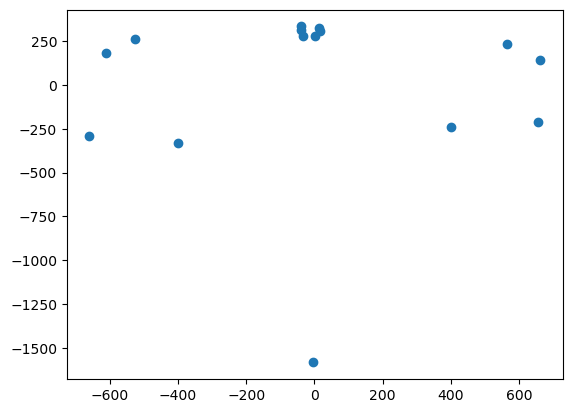

In [14]:
plt.scatter(dft[3309].iloc[5::2], dft[3309].iloc[6::2])

In [15]:
dft[3309].iloc[5::2]

x1     -38.891943
x2     -40.214898
x3     -35.028343
x4       1.726377
x5      16.818203
x6      14.251619
x7    -527.316858
x8    -610.137875
x9     -659.55225
x10    -398.78447
x11     -3.369228
x12    398.978862
x13    655.218192
x14    661.728003
x15     564.57461
Name: 3309, dtype: object

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
G = nx.Graph()
G.add_edge(1, 6)
G.add_edge(1, 7)
G.add_edge(1, 2)
G.add_edge(2, 7)
G.add_edge(2, 9)
G.add_edge(2, 3)
G.add_edge(3, 9)
G.add_edge(3, 11)
G.add_edge(3, 4)
G.add_edge(4, 11)
G.add_edge(4, 13)
G.add_edge(4, 5)
G.add_edge(5, 13)
G.add_edge(5, 15)
G.add_edge(5, 6)
G.add_edge(6, 15)
G.add_edge(7, 8)
G.add_edge(8, 9)
G.add_edge(9, 10)
G.add_edge(10, 11)
G.add_edge(11, 12)
G.add_edge(12, 13)
G.add_edge(13, 14)
G.add_edge(14, 15)

In [14]:
pos = {}
valuesX = dft[383].iloc[5::2]
valuesY = dft[383].iloc[6::2]
for i in range(15):
    pos[i+1] = (valuesX[i],valuesY[i])
print(pos)

NameError: name 'dft' is not defined

<IPython.core.display.Javascript object>


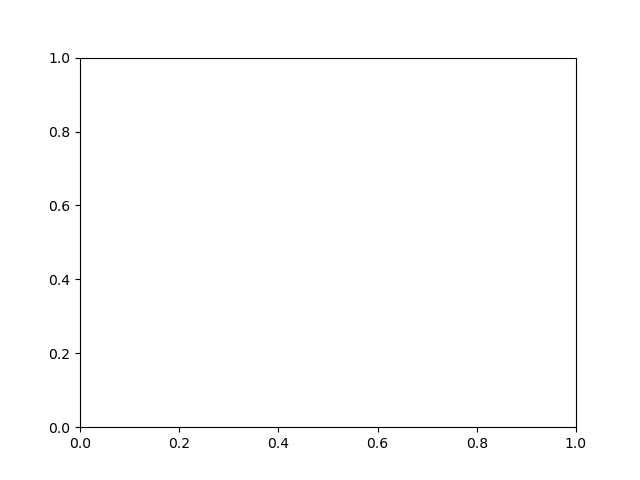

NetworkXError: Node 1 has no position.

In [16]:
options = {
    "font_size": 6,
    "node_size": 70,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.4,
    "width": 1.5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## Compute ECC
- Select number of thresholds

#### Fix direction
- Fix a direction $\omega \in S^1 \subset \mathbb{R}^2$, with $\|\omega\|=1$

In [17]:
%matplotlib notebook
numThresh = 48
theta = 3*np.pi/4
#theta = 1*np.pi/2
omega = (np.cos(theta), np.sin(theta))

#### Sorted list of vertices
- For the given direction ($\omega$) and graph (G) with positional coordinates (pos), get a sorted list of the vertices $v_1,v_2,...,v_n$.
- Do this using the function value of $g_{\omega}(v) = \langle f(v), \omega \rangle = x\cdot \omega_1 + y \cdot \omega_2$, such that
$g_{\omega}(v_i) \leq g_{\omega}(v_j)$ if $i\leq j$ for $i,j\in [1,n]$

In [18]:
# list of vertices and vertex positions
v_list = list(pos.keys())
pos_list = list(pos.values())

In [19]:
# function g 
def g(v): 
    return np.dot(pos_list[v-1],omega)

# sort the v_list using g(v)
v_list.sort(key=g, reverse= True) 
print(v_list)

# save function values for later
g_v = []
for v in v_list:
    g_v.append(g(v))

[]


#### Compute ECC at each potential change point (vertex), we redo this computation later, not necessary to include (except lower_edges() function)

In [20]:
# function to compute the number of lower edges of a vertex $v$
# for a specific direction (included by the use of sorted v_list)
def lower_edges(v):
    L = [n for n in G.neighbors(v)]
    Lg = [g(v) for v in L]
    return sum(n > g(v) for n in Lg)

In [21]:
ECC = []
ECC.append(0)
for i in range(1,len(v_list)+1): # vertex 1,...,n
    x = ECC[i-1] #previous value of ECC
    k = lower_edges(i)
    x+=1 #add 1 to vertex count
    x-=k #subtract its number of lower edges
    ECC.append(x)
ECC = ECC[1:] #Drop the initial 0 value 

[]


<IPython.core.display.Javascript object>


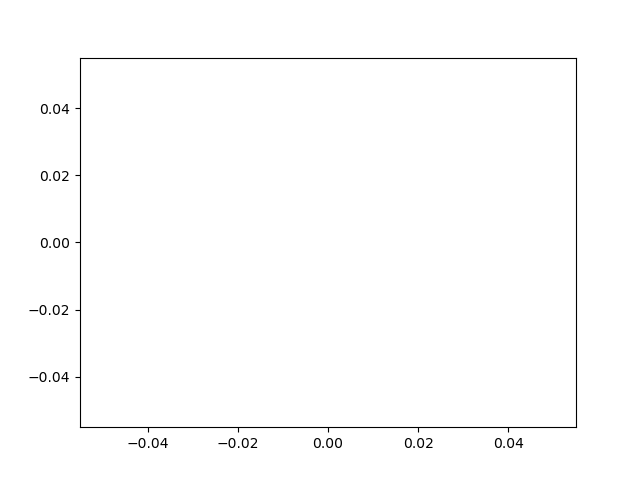

In [22]:
print(ECC)
plt.plot(ECC)

#### Create a bounding box around the graph, and use the number of desired directions to expand ECC vector

In [23]:
# find a bounding box of points
def bounding_box(points):
    x_coord, y_coord = zip(*points)
    return [(min(x_coord), min(y_coord)), (max(x_coord), max(y_coord))]

In [24]:
x, y = zip(*pos_list)
x_box,y_box = zip(*bounding_box(pos_list))

ValueError: not enough values to unpack (expected 2, got 0)

In [25]:
x, y = zip(*pos_list)
x_box,y_box = zip(*bounding_box(pos_list))
# bounding circle midpoint
midpt = ((x_box[0]+x_box[1])/2, (y_box[0]+y_box[1])/2)

ValueError: not enough values to unpack (expected 2, got 0)

In [26]:
plt.scatter(x_box,y_box)
plt.scatter(x,y)
plt.scatter(midpt[0], midpt[1])

NameError: name 'x_box' is not defined

In [31]:
# bounding box size (use to get a radius for the bounding circle)
dist = (math.dist(bounding_box(pos_list)[0],bounding_box(pos_list)[1]))
r = dist/2
print(dist)

2110.232371686838


In [1169]:
r

1.2432293640460528

In [32]:
# Get the filtration starting point on the bounding circle, which is normal to the filtration direction given by theta
start_pt = (midpt[0]+ r*omega[0], midpt[1]+ r*omega[1])

print(start_pt)

(-769.3507477995671, 240.5495518995673)


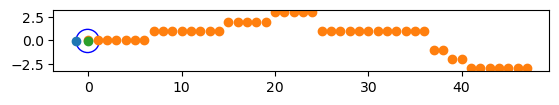

In [509]:
circle2 = plt.Circle(midpt, dist/2, color='blue', fill=False)
fig, ax = plt.subplots() 
ax.autoscale()
ax.set_aspect('equal')
ax.add_patch(circle2)
plt.scatter(start_pt[0],start_pt[1])
#plt.scatter(x_box,y_box)
plt.scatter(x,y)
plt.scatter(midpt[0], midpt[1])

In [34]:
print("distance", dist, 'numThreshes',numThresh)
r_threshes = np.linspace(r, -r, numThresh)

distance 2110.232371686838 numThreshes 48


<IPython.core.display.Javascript object>


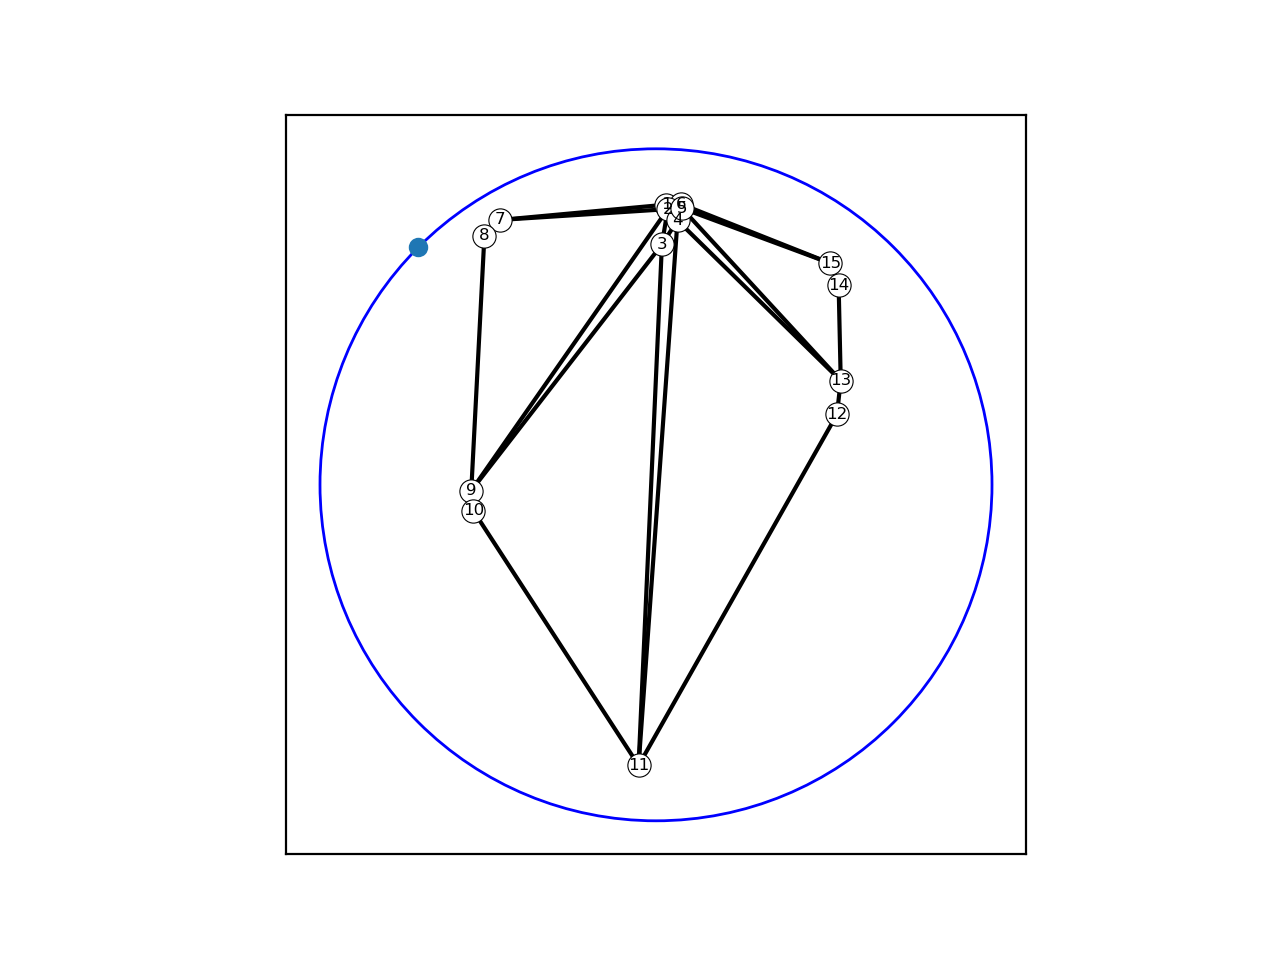

In [35]:
circle2 = plt.Circle(midpt, dist/2, color='blue', fill=False)
fig2, ax2 = plt.subplots() 
ax2.autoscale()
ax2.set_aspect('equal')
ax2.add_patch(circle2)
plt.scatter(start_pt[0],start_pt[1])
options = {
    "font_size": 6,
    "node_size": 70,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.4,
    "width": 1.5,
}
nx.draw_networkx(G, pos, **options)
ax2.grid(False)

plt.savefig('figures/leaf_graph/leaf_graph_direction.png', bbox_inches = 'tight')

<IPython.core.display.Javascript object>


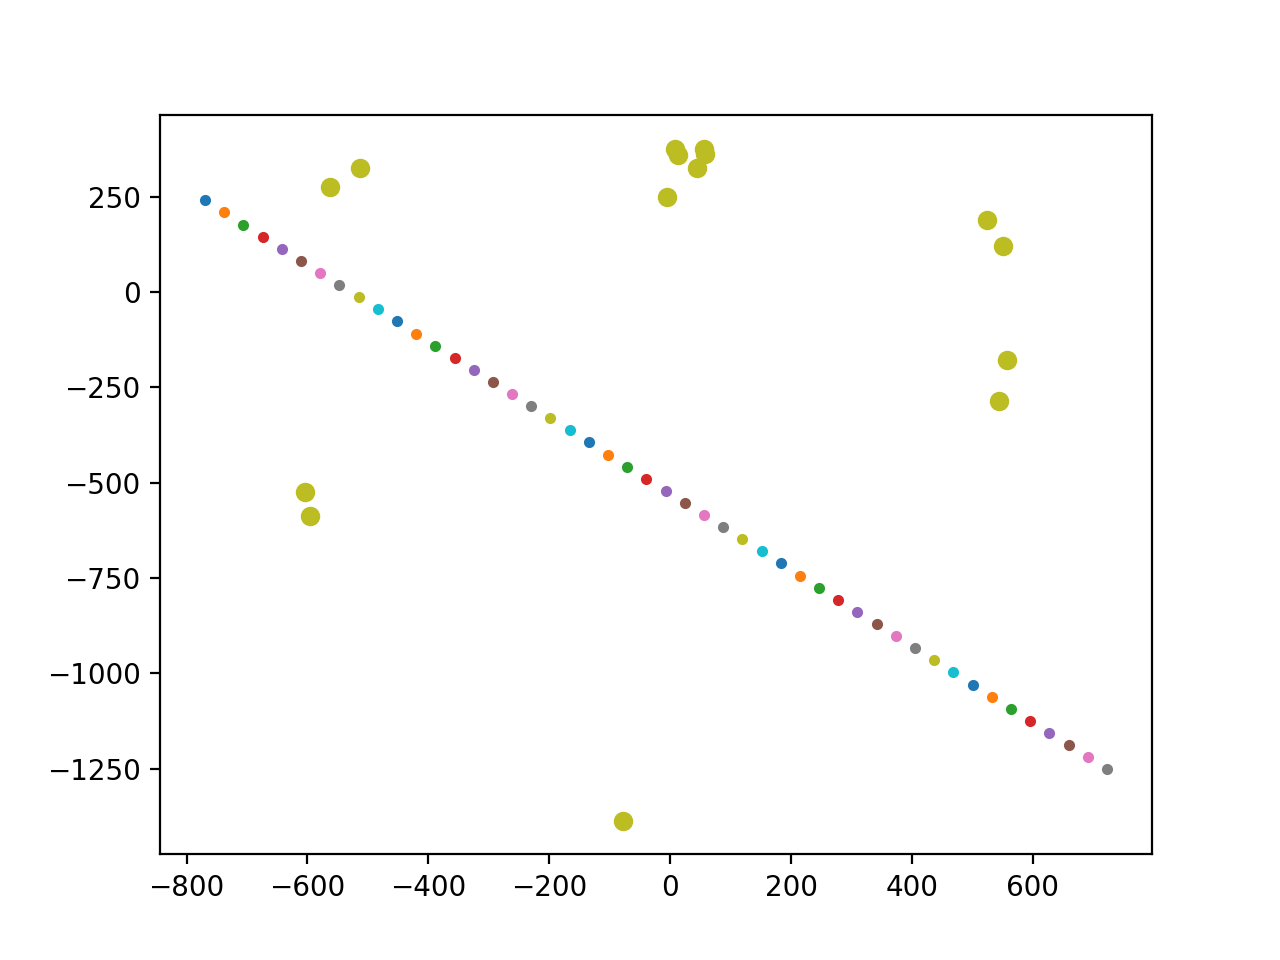

In [36]:
g_thresh = []
for r_thresh in r_threshes:
    pt = (midpt[0]+ r_thresh*omega[0], midpt[1]+ r_thresh*omega[1])
    #print(pt)
    #print('g(thresh) = ', np.dot(pt,omega))
    g_thresh.append(np.dot(pt,omega))
    plt.scatter(pt[0],pt[1], marker='.')
plt.scatter(x,y)

#### Compute the full ECC vector using the lower_edges() function

In [37]:
# Full ECC vector
ECC = []
ECC.append(0)
v = 0 # 
for i in range(1,numThresh+1):
    if v==len(v_list):
        ECC.append(ECC[i-1])
    elif (g_thresh[i-1] < g(v_list[v])) & (v<len(v_list)):
        x = ECC[i-1] #previous value of ECC
        k = lower_edges(v_list[v])
        x+=1 #add 1 to vertex count
        x-=k #subtract the the number of lower edges
        ECC.append(x)
        v+=1 # move to the next vertex in v_list
    else:
        ECC.append(ECC[i-1])
ECC = ECC[1:] #Drop the initial 0 value        


#### Plot the ECC curve

<IPython.core.display.Javascript object>


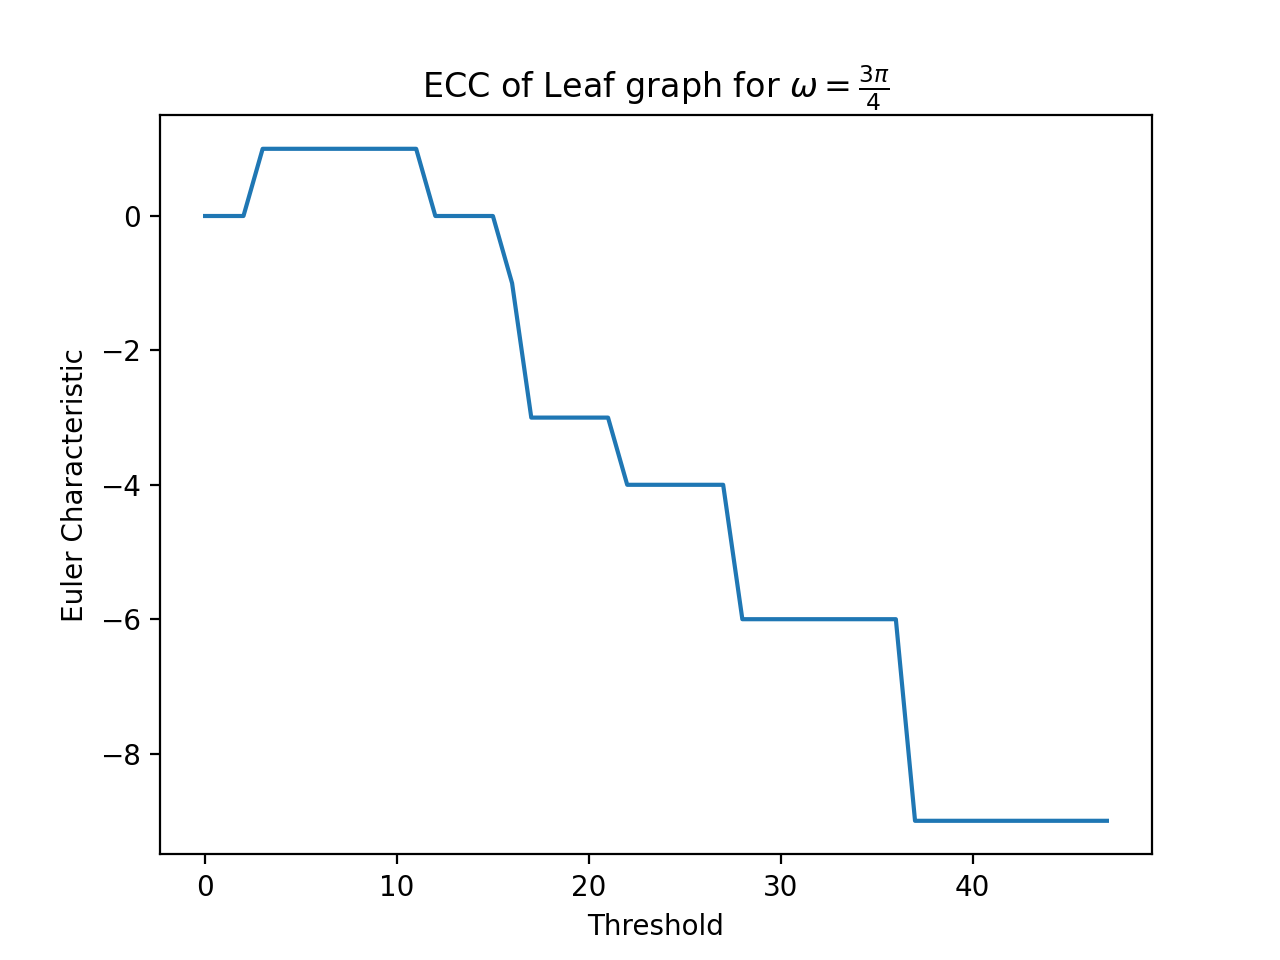

In [38]:
plt.plot(ECC)

ax = plt.gca()
plt.xlabel(r'Threshold')
plt.ylabel(r'Euler Characteristic')

plt.title(r'ECC of Leaf graph for $\omega =\frac{3\pi}{4}$')

plt.savefig('figures/leaf_graph/leaf_ECC_one_direction.png', bbox_inches = 'tight', dpi=300)

### Function to compute ECC vector 
Includes code from above to compute ECC for a given graph G and chosen # thresholds
ECC(G, heights, numThresh)

In [27]:
def ECC(G, pos, theta, numThresh):
    omega = (np.cos(theta), np.sin(theta))
    
    # list of vertices and vertex positions
    v_list = list(pos.keys())
    pos_list = list(pos.values())
    
    # function g 
    def g(v): 
        return np.dot(pos_list[v-1],omega)
    # sort the v_list using g(v)
    v_list.sort(key=g, reverse = True) 
    #print('theta:', theta, 'v_list:', v_list)
    
        
    # function to compute the number of lower edges of a vertex $v$
    # for a specific direction (included by the use of sorted v_list)
    def lower_edges(v):
        L = [n for n in G.neighbors(v)]
        Lg = [g(v) for v in L]
        return sum(n > g(v) for n in Lg)
    
    # find a bounding box of points
    def bounding_box(points):
        x_coord, y_coord = zip(*points)
        return [(min(x_coord), min(y_coord)), (max(x_coord), max(y_coord))]

    x, y = zip(*pos_list)
    x_box,y_box = zip(*bounding_box(pos_list))
    # bounding box size (use to get a radius for the bounding circle)
    dist = (math.dist(bounding_box(pos_list)[0],bounding_box(pos_list)[1]))
    r = dist/2
    # bounding circle midpoint
    midpt = ((x_box[0]+x_box[1])/2, (y_box[0]+y_box[1])/2)
    # Get the filtration starting point on the bounding circle, which is normal to the filtration direction given by theta
    #start_pt = (midpt[0]+ r*omega[0], midpt[1]+ r*omega[1])
    
    r_threshes = np.linspace(r, -r, numThresh)
    g_thresh=[]
    for r_thresh in r_threshes:
        pt = (midpt[0]+ r_thresh*omega[0], midpt[1]+ r_thresh*omega[1])
        g_thresh.append(np.dot(pt,omega))

   

    # Full ECC vector
    ecc = []
    ecc.append(0)
    v = 0 # 
    for i in range(1,numThresh+1):
        if v==len(v_list):
            ecc.append(ecc[i-1])
        elif (g_thresh[i-1] < g(v_list[v])) & (v<len(v_list)):
            x = ecc[i-1] #previous value of ECC
            k = lower_edges(v_list[v])
            x+=1 #add 1 to vertex count
            x-=k #subtract the the number of lower edges
            ecc.append(x)
            v+=1 # move to the next vertex in v_list
        else:
            ecc.append(ecc[i-1])
    ecc = ecc[1:] #Drop the initial 0 value   
    print('v_list', v_list)
    
    
    return ecc


### ECC in multiple directions (ECT)

In [40]:
# Select directions around the circle
numCircleDirs = 32
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)
circledirs

print(circledirs/np.pi)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
 1.875  1.9375]


In [41]:
# Choose number of thresholds for the ECC
numThresh = 48

In [42]:
ECT_preprocess = {}

for i, angle in enumerate(circledirs):

    outECC = ECC(G, pos, theta=angle, numThresh = numThresh)
    
    ECT_preprocess[i] = (angle,outECC)
    


v_list [13, 14, 12, 15, 5, 6, 4, 2, 1, 3, 11, 7, 8, 10, 9]
v_list [14, 15, 13, 12, 6, 5, 4, 2, 1, 3, 11, 7, 8, 9, 10]
v_list [15, 14, 13, 12, 6, 5, 4, 1, 2, 3, 7, 8, 11, 9, 10]
v_list [15, 14, 13, 12, 6, 5, 4, 1, 2, 3, 7, 8, 9, 10, 11]
v_list [15, 14, 6, 5, 1, 13, 2, 4, 12, 3, 7, 8, 9, 10, 11]
v_list [15, 14, 6, 5, 1, 2, 4, 3, 13, 12, 7, 8, 9, 10, 11]
v_list [15, 6, 5, 1, 2, 14, 4, 3, 7, 13, 8, 12, 9, 10, 11]
v_list [6, 1, 5, 2, 4, 15, 3, 14, 7, 8, 13, 12, 9, 10, 11]
v_list [6, 1, 5, 2, 7, 4, 8, 3, 15, 14, 13, 12, 9, 10, 11]
v_list [7, 8, 1, 6, 2, 5, 4, 3, 15, 14, 13, 12, 9, 10, 11]
v_list [7, 8, 1, 2, 6, 5, 4, 3, 15, 14, 9, 10, 13, 12, 11]
v_list [7, 8, 1, 2, 6, 5, 4, 3, 9, 15, 10, 14, 13, 12, 11]
v_list [8, 7, 1, 2, 6, 5, 4, 3, 9, 10, 15, 14, 13, 12, 11]
v_list [8, 7, 9, 1, 2, 10, 6, 5, 4, 3, 15, 14, 13, 12, 11]
v_list [8, 7, 9, 10, 1, 2, 3, 6, 5, 4, 15, 11, 14, 13, 12]
v_list [8, 7, 9, 10, 1, 2, 3, 4, 6, 5, 11, 15, 14, 13, 12]
v_list [9, 10, 8, 7, 11, 3, 1, 2, 4, 6, 5, 15, 12, 14, 1

In [43]:
# Making a matrix of size numThresh x numCircleDirs
# M[i,j] = 
M = np.empty([numThresh,numCircleDirs])
for j in range(M.shape[1]):
    M[:,j] = ECT_preprocess[j][1]

<IPython.core.display.Javascript object>


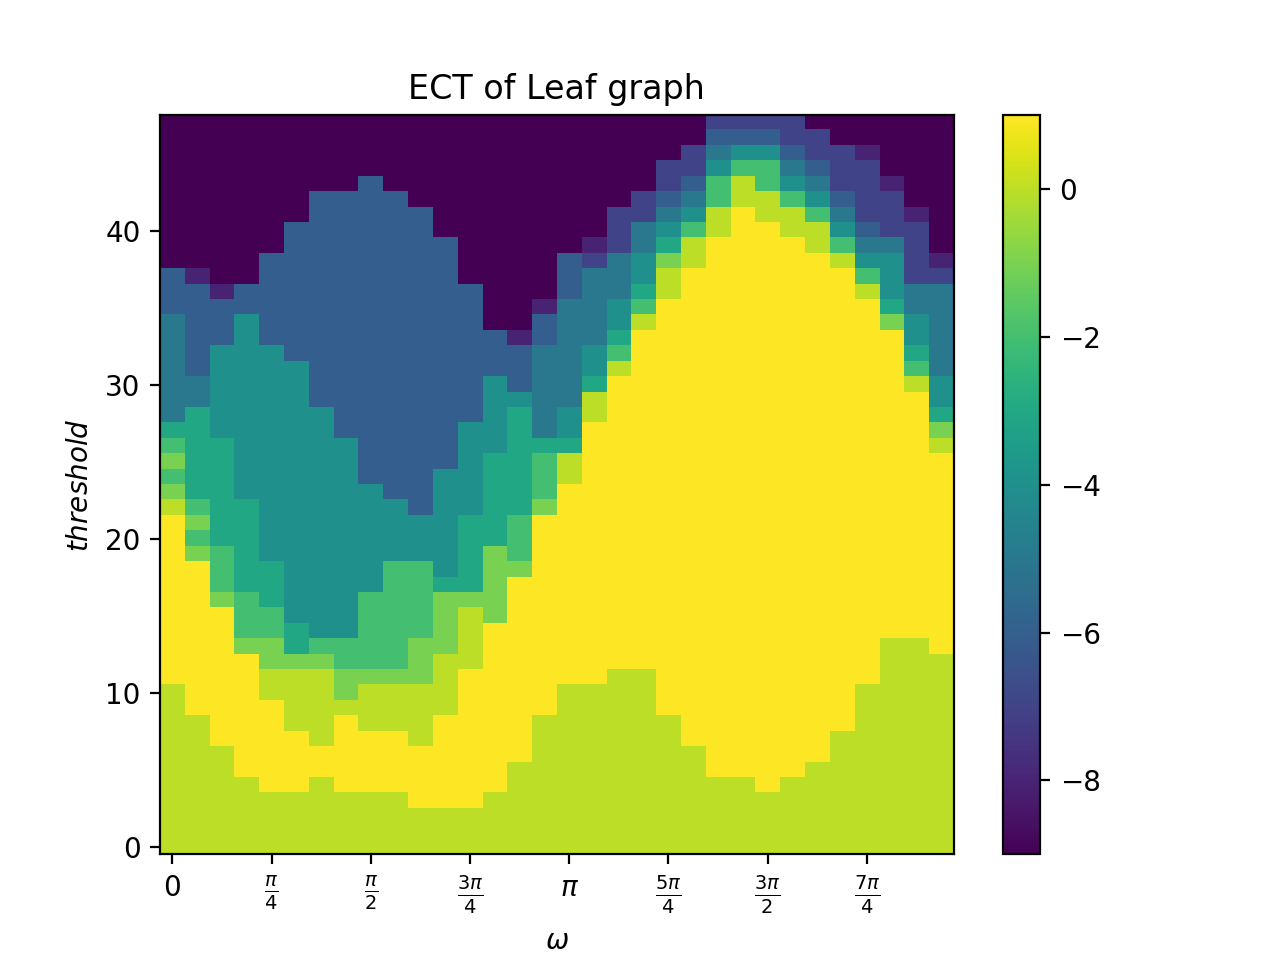

In [44]:
plt.imshow(M, cmap = 'viridis', aspect='auto')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))
ax.autoscale() 

labels = [r'$0$',
          r'$\frac{\pi}{4}$',
          r'$\frac{\pi}{2}$',
          r'$\frac{3\pi}{4}$',
          r'$\pi$',
          r'$\frac{5\pi}{4}$',
          r'$\frac{3\pi}{2}$',
          r'$\frac{7\pi}{4}$',
          r'$2\pi$',
         ]
ax.invert_yaxis()
ax.set_xticklabels(labels)
ax.grid(False)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$threshold$')

plt.title(r'ECT of Leaf graph')

plt.savefig('figures/leaf_graph/Leaf_ECT_nogrid.png', bbox_inches = 'tight', dpi=300)

<IPython.core.display.Javascript object>


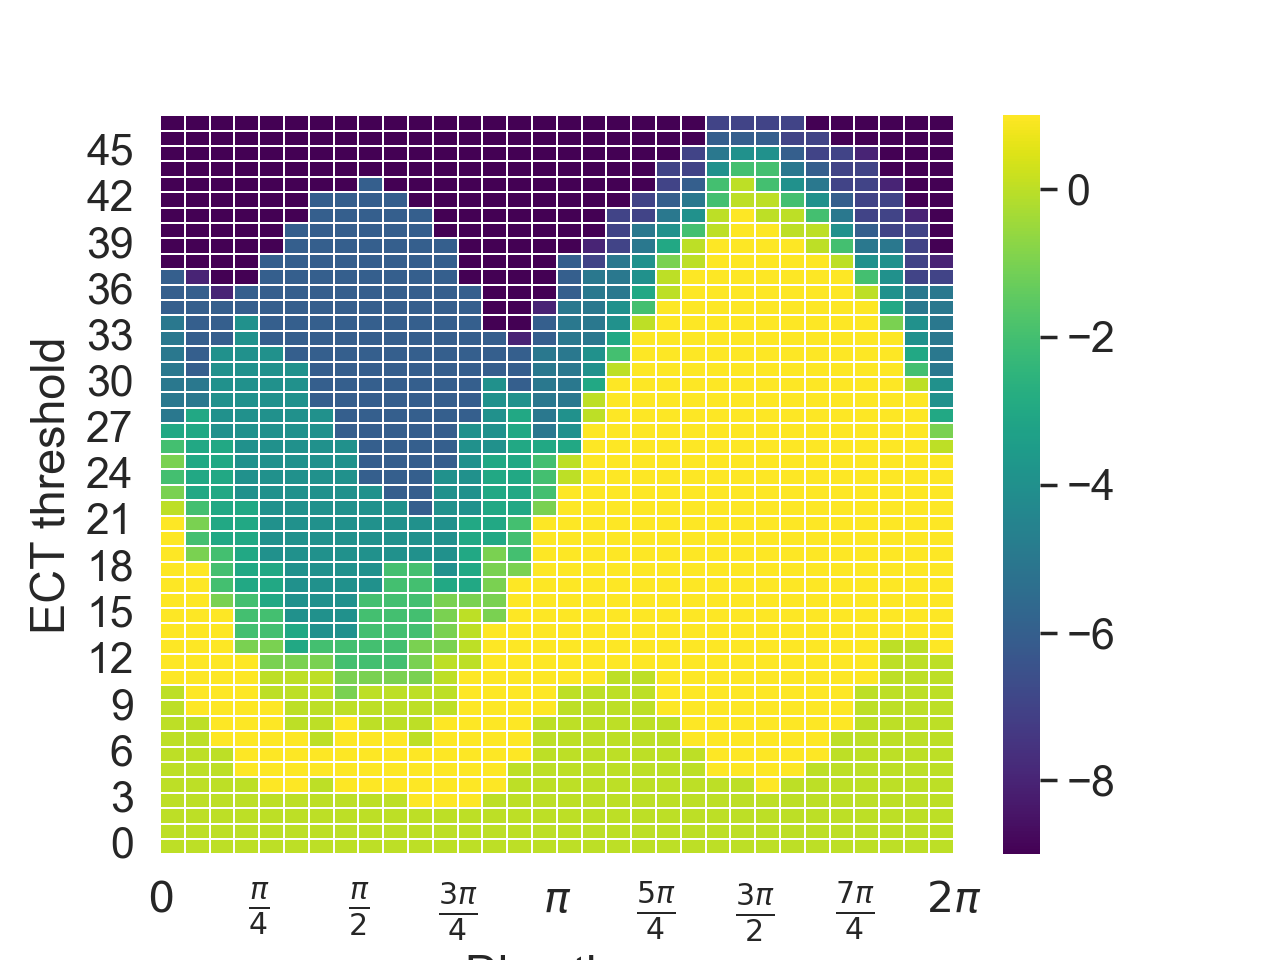

In [45]:
sns.set(font_scale=1.4)
#plt.figure(figsize=(7, 4))
ax = sns.heatmap(M,linewidths=.01, cmap = 'viridis')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))
labels = [r'$0$',
          r'$\frac{\pi}{4}$',
          r'$\frac{\pi}{2}$',
          r'$\frac{3\pi}{4}$',
          r'$\pi$',
          
          r'$\frac{5\pi}{4}$',
          r'$\frac{3\pi}{2}$',
          r'$\frac{7\pi}{4}$',
          r'$2\pi$',
         ]
ax.set_xticklabels(labels)

ax.set_xlabel("Direction")
ax.set_ylabel("ECT threshold")

plt.savefig('figures/leaf_graph/leaf_ECT_grid.png', bbox_inches = 'tight',dpi=300)

## Cylinder plot of ECT

In [70]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [71]:
#COLORS
color_dimension = M # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

NameError: name 'matplotlib' is not defined

<IPython.core.display.Javascript object>


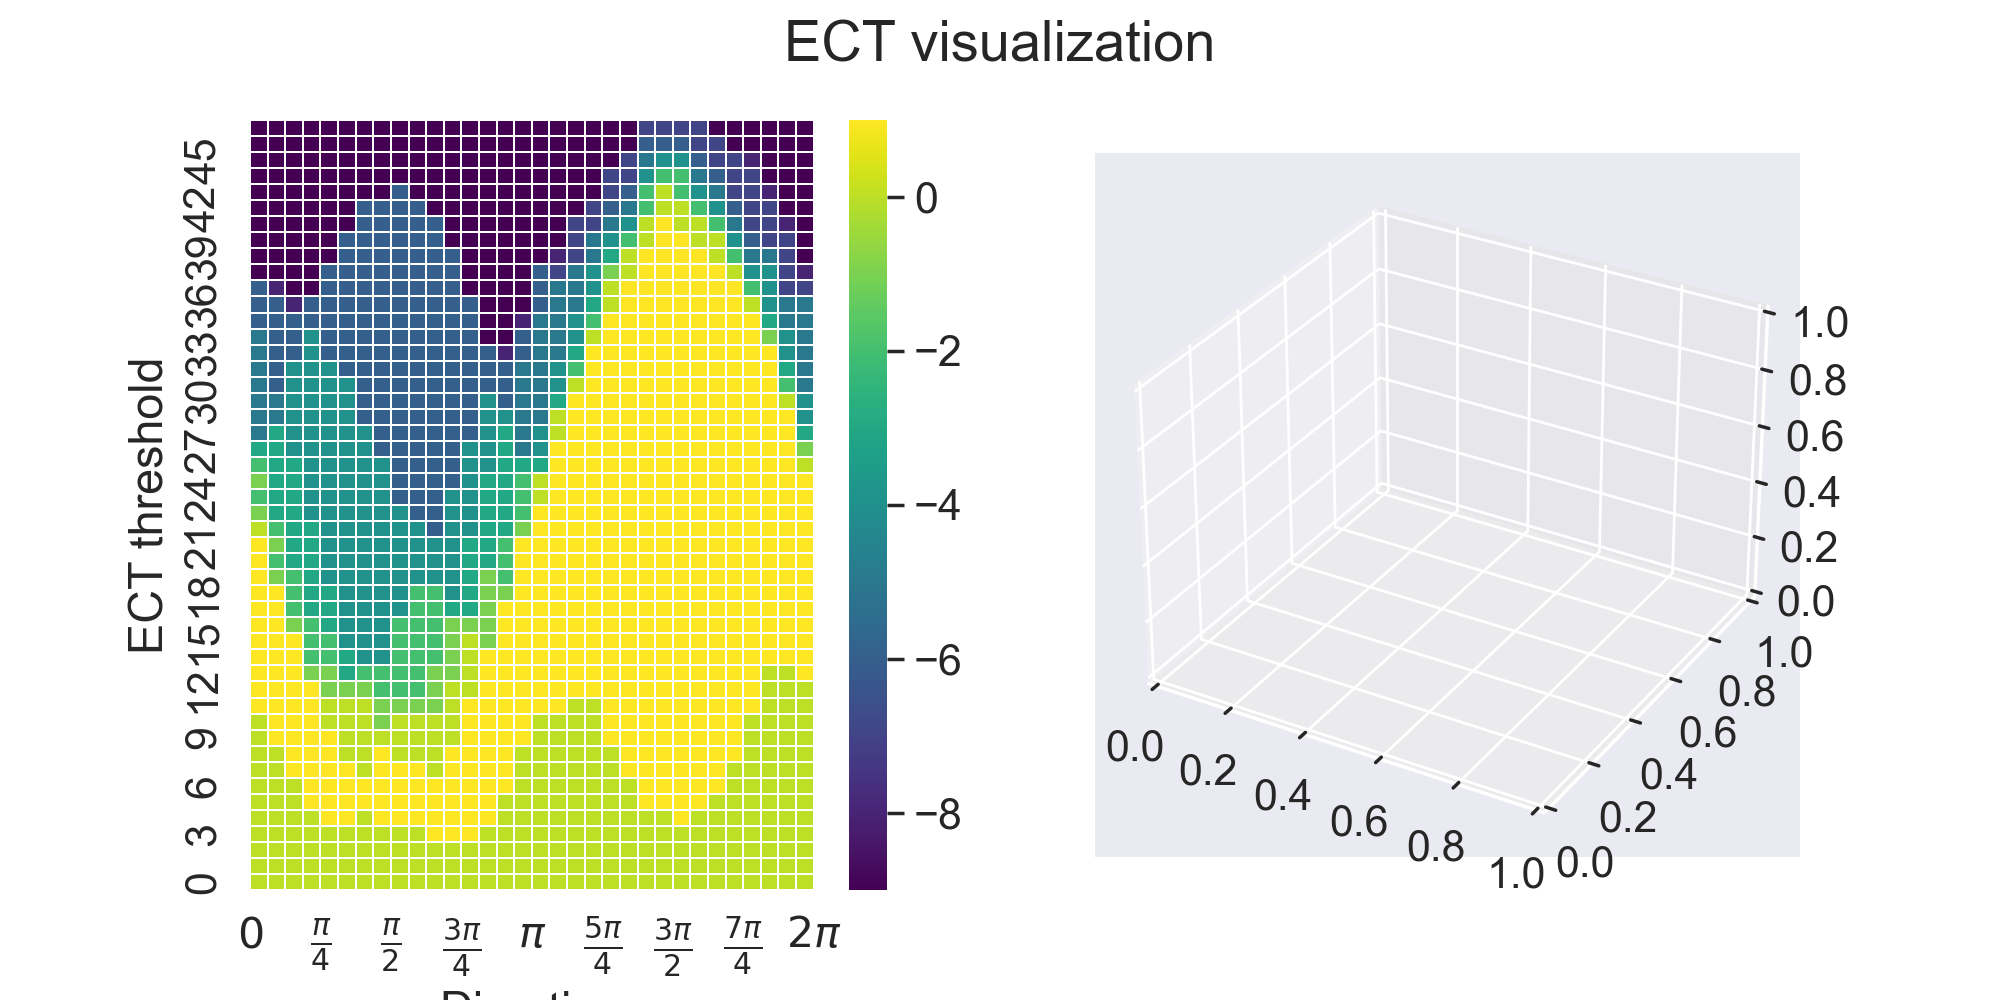

NameError: name 'fcolors' is not defined

In [72]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('ECT visualization')

# First subplot
ax1 = fig.add_subplot(1, 2, 1)
df = pd.DataFrame(M)
ax1 = sns.heatmap(df, cmap = 'viridis', annot=False, linewidths = 0.6, annot_kws={"size": 7}, fmt=".2%")
ax1.invert_yaxis()
ax1.set_xticks(np.arange(0,numCircleDirs+1,4))
ax1.set_xticklabels(labels)
ax1.set_xlabel("Direction")
ax1.set_ylabel("ECT threshold")

# 2nd subplot
ax2 = fig.add_subplot(1,2,2, projection='3d')

theta = np.linspace(0, 2 * np.pi, numCircleDirs)


x = np.linspace(0, numThresh, numThresh)
thetas, xs = np.meshgrid(theta, x)
y = np.cos(thetas)
z = np.sin(thetas)
surf = ax2.plot_surface(xs, y, z, facecolors = fcolors)
surf.set_edgecolor('w')
ax2.set_axis_off()
plt.show()

plt.savefig('figures/leaf_graph/leaf_ECT_cylinder.png', bbox_inches = 'tight', dpi=300)

### String out vector of ECT

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
vectorM = M.flatten('F') #flatten in column-major order

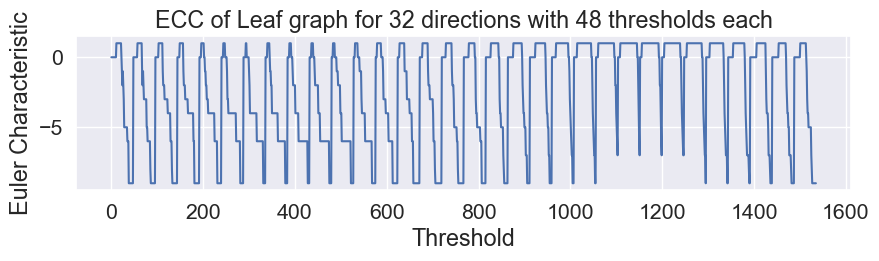

In [48]:
plt.figure(figsize=(10,2))
sns.lineplot(vectorM)

ax = plt.gca()
plt.xlabel(r'Threshold')
plt.ylabel(r'Euler Characteristic')

plt.title(r'ECC of Leaf graph for '+str(numCircleDirs)+' directions with '+str(numThresh)+' thresholds each')

plt.savefig('figures/leaf_graph/leaf_ECC_vector.png', bbox_inches = 'tight', dpi=300)

### Plot one direction

In [49]:
angle = 3*np.pi/4

In [50]:
M_1dir = M[:,np.where(circledirs==angle)].flatten()

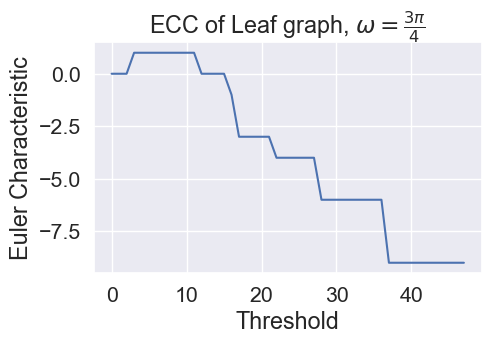

In [51]:
plt.figure(figsize=(5,3))
sns.lineplot(M_1dir)

ax = plt.gca()
plt.xlabel(r'Threshold')
plt.ylabel(r'Euler Characteristic')

plt.title(r'ECC of Leaf graph, $\omega = \frac{3\pi}{4}$')

plt.savefig('figures/leaf_graph/leaf_ECC_r$\frac{3\pi}{4}$', bbox_inches = 'tight', dpi=300)

# Toy graph for illustration figures

In [224]:
G = nx.Graph()
G.add_edge(0, 5)
G.add_edge(0, 6)
G.add_edge(0, 1)
G.add_edge(1, 6)
G.add_edge(1, 8)
G.add_edge(1, 2)
G.add_edge(2, 8)
G.add_edge(2, 4)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(3, 7)
G.add_edge(5,7)


In [301]:
pos = nx.spring_layout(G)


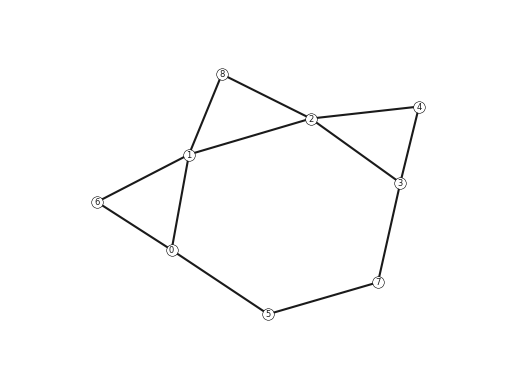

In [302]:
options = {
    "font_size": 6,
    "node_size": 70,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.4,
    "width": 1.5,
}
nx.draw_networkx(G,pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [510]:
pos_list = list(pos.values())
def bounding_box(points):
    """
    Function to find a bounding box of a set of points.
    """
    x_coord, y_coord = zip(*points)
    return [(min(x_coord), min(y_coord)), (max(x_coord), max(y_coord))]

x_box,y_box = zip(*bounding_box(pos_list)) # build a bounding box
# bounding box size (use to get a radius for the bounding circle)
dist = math.dist((x_box[0],y_box[0]),(x_box[1],y_box[1]))
r = dist/2
print(r)

1.2432293640460528


In [511]:
# list of vertices and vertex positions
v_list = list(pos.keys())
pos_list = list(pos.values())

In [512]:
# function g 
def g(v): 
    return np.dot(v_pos_list[v],omega)

# sort the v_list using g(v)
v_list.sort(key=g, reverse= True) 
print(v_list)

# save function values for later
g_v = []
for v in v_list:
    g_v.append(g(v))
print(g_v)

[6, 0, 1, 8, 5, 2, 7, 3, 4]
[1.0, 0.5755834783262803, 0.4769754806402945, 0.289776820020739, 0.02676994923241119, -0.21568801503480672, -0.5977104305300365, -0.7245828566869114, -0.8311244259679706]


In [513]:
# Select directions around the circle
numCircleDirs = 32
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)
print(circledirs/np.pi)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
 1.875  1.9375]


In [514]:
# Choose number of thresholds for the ECC
numThresh = 48

In [515]:
ECT_preprocess = {}

for i, angle in enumerate(circledirs):

    outECC = ECC(G, pos, theta=angle, numThresh = numThresh)
    
    ECT_preprocess[i] = (angle,outECC)

v_list [7, 8, 0, 6, 2, 5, 4, 1, 3]
v_list [7, 8, 0, 6, 5, 2, 4, 1, 3]
v_list [7, 8, 6, 0, 5, 4, 2, 1, 3]
v_list [7, 8, 6, 5, 0, 4, 2, 1, 3]
v_list [7, 8, 6, 5, 0, 4, 2, 1, 3]
v_list [7, 6, 5, 8, 4, 0, 3, 1, 2]
v_list [7, 5, 6, 8, 4, 0, 3, 1, 2]
v_list [5, 7, 6, 8, 4, 3, 0, 1, 2]
v_list [5, 7, 6, 4, 8, 3, 1, 0, 2]
v_list [5, 6, 7, 4, 3, 8, 1, 0, 2]
v_list [5, 4, 6, 3, 7, 1, 8, 2, 0]
v_list [5, 3, 4, 6, 7, 1, 8, 2, 0]
v_list [5, 3, 4, 6, 1, 7, 8, 2, 0]
v_list [3, 5, 4, 1, 6, 7, 2, 8, 0]
v_list [3, 5, 4, 1, 6, 2, 7, 8, 0]
v_list [3, 4, 1, 5, 6, 2, 8, 7, 0]
v_list [3, 1, 4, 5, 2, 6, 0, 8, 7]
v_list [3, 1, 4, 2, 5, 6, 0, 8, 7]
v_list [3, 1, 2, 4, 5, 0, 6, 8, 7]
v_list [3, 1, 2, 4, 0, 5, 6, 8, 7]
v_list [3, 1, 2, 4, 0, 5, 6, 8, 7]
v_list [2, 1, 3, 0, 4, 8, 5, 6, 7]
v_list [2, 1, 3, 0, 4, 8, 6, 5, 7]
v_list [2, 1, 0, 3, 4, 8, 6, 7, 5]
v_list [2, 0, 1, 3, 8, 4, 6, 7, 5]
v_list [2, 0, 1, 8, 3, 4, 7, 6, 5]
v_list [0, 2, 8, 1, 7, 3, 6, 4, 5]
v_list [0, 2, 8, 1, 7, 6, 4, 3, 5]
v_list [0, 2, 8, 7, 

In [516]:
%matplotlib inline

In [517]:
# Making a matrix of size numThresh x numCircleDirs
# M[i,j] = 
M = np.empty([numThresh,numCircleDirs])
for j in range(M.shape[1]):
    M[:,j] = ECT_preprocess[j][1]

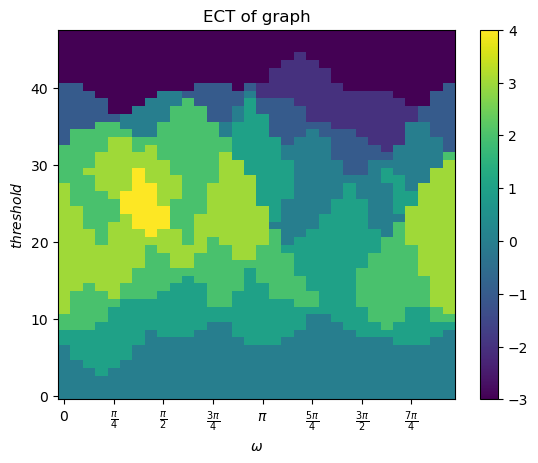

In [518]:
plt.imshow(M, cmap = 'viridis', aspect='auto')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))
ax.autoscale() 

labels = [r'$0$',
          r'$\frac{\pi}{4}$',
          r'$\frac{\pi}{2}$',
          r'$\frac{3\pi}{4}$',
          r'$\pi$',
          r'$\frac{5\pi}{4}$',
          r'$\frac{3\pi}{2}$',
          r'$\frac{7\pi}{4}$',
          r'$2\pi$',
         ]
ax.invert_yaxis()
ax.set_xticklabels(labels)
ax.grid(False)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$threshold$')

plt.title(r'ECT of graph')

plt.savefig('figures/crown_graph/crown_graph_ECT.png', bbox_inches = 'tight', dpi=300)

In [981]:
len(g_thresh)
print(max(g_thresh))
print(min(g_thresh))
a = np.linspace(-1.4,1.4, num=48)
print(a)
ticks = list(a[0::8])

ticks.append(1.4)
print(ticks)

1.148959648271577
-1.3374990798205286
[-1.4        -1.34042553 -1.28085106 -1.2212766  -1.16170213 -1.10212766
 -1.04255319 -0.98297872 -0.92340426 -0.86382979 -0.80425532 -0.74468085
 -0.68510638 -0.62553191 -0.56595745 -0.50638298 -0.44680851 -0.38723404
 -0.32765957 -0.26808511 -0.20851064 -0.14893617 -0.0893617  -0.02978723
  0.02978723  0.0893617   0.14893617  0.20851064  0.26808511  0.32765957
  0.38723404  0.44680851  0.50638298  0.56595745  0.62553191  0.68510638
  0.74468085  0.80425532  0.86382979  0.92340426  0.98297872  1.04255319
  1.10212766  1.16170213  1.2212766   1.28085106  1.34042553  1.4       ]
[-1.4, -0.9234042553191488, -0.44680851063829785, 0.029787234042553123, 0.5063829787234042, 0.9829787234042553, 1.4]


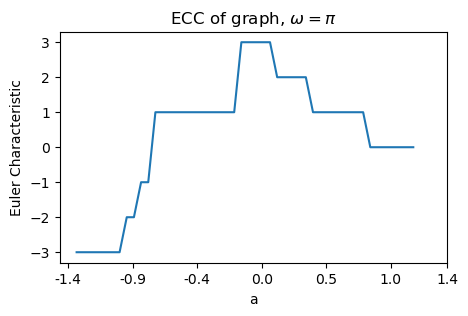

In [982]:
plt.style.use('default')
angle = 1*np.pi
omega = (np.cos(angle), np.sin(angle))
M_1dir = M[:,np.where(circledirs==angle)].flatten()
plt.figure(figsize=(5,3))
plt.plot(g_thresh,M_1dir)

ax = plt.gca()
plt.xlabel(r'a')
ax.set_xticks(ticks)
ax.set_xticklabels([f'{x:1.1f}' for x in ticks])
#[f'\\${x:1.2f}' for x in xticks]
plt.ylabel(r'Euler Characteristic')

plt.title(r'ECC of graph, $\omega = \pi$')

plt.savefig('figures/crown_graph/crown_graph_ECC', bbox_inches = 'tight', dpi=300)

In [638]:
x, y = zip(*list(pos.values()))
x_box,y_box = zip(*bounding_box(pos_list))
# bounding circle midpoint
midpt = ((x_box[0]+x_box[1])/2, (y_box[0]+y_box[1])/2)
dist = (math.dist(bounding_box(pos_list)[0],bounding_box(pos_list)[1]))
r = dist/2
print(r)

1.2432293640460528


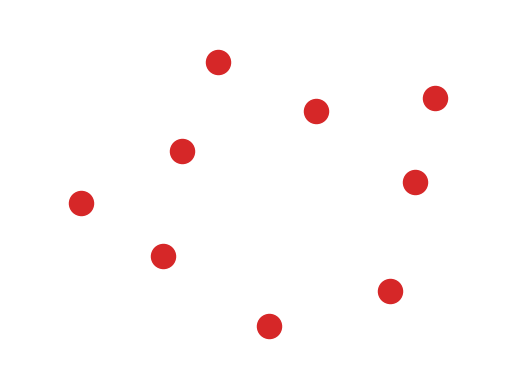

In [639]:
sweep = r_threshes[25]
nx.draw_networkx_nodes(G, pos,nodelist = nodes_iter, node_color="tab:red")
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [1074]:
# direction

theta = circledirs[30]
omega = (np.cos(theta), np.sin(theta))

# list of vertices and vertex positions
v_list = list(pos.keys())
pos_list = list(pos.values())

#ECC in this direction
M_1dir = M[:,np.where(circledirs==theta)].flatten()

#bounding box: midpt and start_pt
x, y = zip(*pos_list)
x_box,y_box = zip(*bounding_box(pos_list))
# bounding box size (use to get a radius for the bounding circle)
dist = (math.dist(bounding_box(pos_list)[0],bounding_box(pos_list)[1]))
r = dist/2


# bounding circle midpoint
midpt = ((x_box[0]+x_box[1])/2, (y_box[0]+y_box[1])/2)
start_pt = (midpt[0]+ r*omega[0], midpt[1]+ r*omega[1])

r_threshes = np.linspace(r, -r, numThresh)
g_thresh=[]
for r_thresh in r_threshes:
    pt = (midpt[0]+ r_thresh*omega[0], midpt[1]+ r_thresh*omega[1])
    g_thresh.append(np.dot(pt,omega))
g_thresh_r = g_thresh[::-1]

In [1075]:
#sorted vertex list for this direction
v_pos_list = {v_list[i]: pos_list[i] for i in range(len(v_list))}
# sort the v_list using g(v)
v_list.sort(key=g, reverse= True) 
print(v_list)


[7, 3, 4, 5, 2, 0, 1, 8, 6]


In [1076]:
all_edges = []
for v in v_list:
    thresh = g(v)
    edges=[]
    for e in edge_list:
        if g(e[0])>=thresh and g(e[1])>=thresh:
            edges.append((e[0],e[1]))
    all_edges.append(edges)
print(all_edges)

[[], [(3, 7)], [(4, 3), (3, 7)], [(5, 7), (4, 3), (3, 7)], [(5, 7), (2, 4), (2, 3), (4, 3), (3, 7)], [(0, 5), (5, 7), (2, 4), (2, 3), (4, 3), (3, 7)], [(0, 5), (0, 1), (5, 7), (1, 2), (2, 4), (2, 3), (4, 3), (3, 7)], [(0, 5), (0, 1), (5, 7), (1, 8), (1, 2), (8, 2), (2, 4), (2, 3), (4, 3), (3, 7)], [(0, 5), (0, 6), (0, 1), (5, 7), (6, 1), (1, 8), (1, 2), (8, 2), (2, 4), (2, 3), (4, 3), (3, 7)]]


In [1077]:
v_changes=[]
for v in v_list:
    thresh = g(v)
    idx = next(i for i,v in enumerate(g_thresh) if v < thresh)
    v_changes.append(idx)
print(v_changes)


[8, 10, 12, 17, 23, 30, 33, 34, 40]


[7, 3, 4, 5, 2, 0, 1, 8, 6]


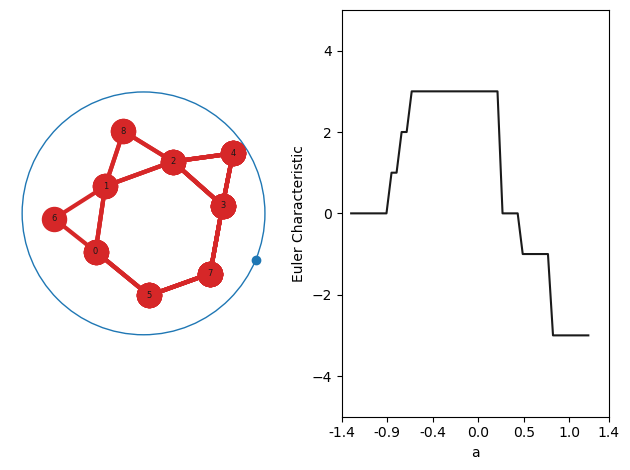

In [1078]:
import matplotlib.animation as animation

x = np.arange(numThresh)
y = M_1dir

fig, (ax1, ax2) = plt.subplots(1,2)
####
circle = plt.Circle(midpt, dist/2, color='tab:blue', fill=False)
ax1.autoscale()
ax1.axis('off')
ax1.set_aspect('equal')
ax1.add_patch(circle)
ax1.scatter(start_pt[0],start_pt[1], marker = 'o', color='tab:blue')
options = {
    "font_size": 6,
    "node_size": 70,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.4,
    "width": 1.5,
}
nx.draw_networkx(G, pos,ax = ax1, **options)
ax1.grid(False)
#nodes = nx.draw_networkx_nodes(G, pos, nodelist=nodes_iter,node_color="tab:red", ax=ax1)




sweep = ax1.plot([], [], color='tab:blue',animated=True)[0]



####
line, = ax2.plot(g_thresh_r, y, color='k')
a = np.linspace(-1.4,1.4, num=48)
ticks = list(a[0::8])
ticks.append(1.4)

ax2.set_xlabel(r'a')
ax2.set_xticks(ticks)
ax2.set_xticklabels([f'{x:1.1f}' for x in ticks])

ax2.set_ylabel(r'Euler Characteristic')
fig.tight_layout()

np.insert(M_1dir, 0,0)
def update(num, g_thresh_r, y, line, nodes, sweep):
    line.set_data(g_thresh_r[:num+1], y[:num+1])
    line.axes.axis([-1.4, 1.4, min(M_1dir)-2,max(M_1dir)+2 ])
    #print('num',num)

        
    T = (midpt[0]+ r_threshes[num]*omega[0], midpt[1]+ r_threshes[num]*omega[1])
    B = math.dist(T,midpt)
    theta_b = np.arccos(B/r)
    theta_c = theta - theta_b
    if num < .5*numThresh:
        x1 = midpt[0] + (r * np.cos(theta_b + theta))
        y1 = midpt[1] + (r * np.sin(theta_b + theta))

        x2 = midpt[0] + (r * np.cos(theta_c))
        y2 = midpt[1] + (r * np.sin(theta_c))
    else:
        x1 = midpt[0] + (r * np.cos(np.pi + theta_b + theta))
        y1 = midpt[1] + (r * np.sin(np.pi +theta_b + theta))

        x2 = midpt[0] + (r * np.cos(np.pi +theta_c))
        y2 = midpt[1] + (r * np.sin(np.pi +theta_c))    
        
        
    sweep.set_xdata([x1,x2])
    sweep.set_ydata([y1,y2])

    ver = 0
    if num in v_changes:
        ver = v_changes.index(num)
        #print('ver',ver)
        #print('add nodes:',v_list[:ver+1])
        nodes= nx.draw_networkx_nodes(G, pos, nodelist=v_list[:ver+1],node_color="tab:red", ax=ax1)
        #print('add edges:',all_edges[ver])
        edges = nx.draw_networkx_edges(G, pos, edgelist=all_edges[ver],edge_color="tab:red",width=3, ax=ax1)       
        
        
    return line, nodes

#print(changes)
print(v_list)
ani = animation.FuncAnimation(fig, update, len(g_thresh_r), fargs=[g_thresh_r, y, line, nodes, sweep],interval=100, blit=True)
ani.save('figures/ECT30.gif')
plt.show()

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 3.0
3.0 3.0
3.0 3.0
3.0 3.0
3.0 3.0
3.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 -1.0
-1.0 -1.0
-1.0 -2.0
-2.0 -2.0
-2.0 -3.0
-3.0 -3.0
-3.0 -3.0
-3.0 -3.0
-3.0 -3.0
-3.0 -3.0
-3.0 -3.0


In [153]:
changes

[7, 14, 21, 24, 30, 36, 39, 41, 42]

In [80]:
import matplotlib.pyplot as plt

In [392]:
edge_dict['edges'+str(3)]

[(4, 5), (3, 5), (3, 4)]

In [357]:
M_1dir

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,
        4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,
        0.,  0., -3., -3., -3., -3., -3., -3., -3.])

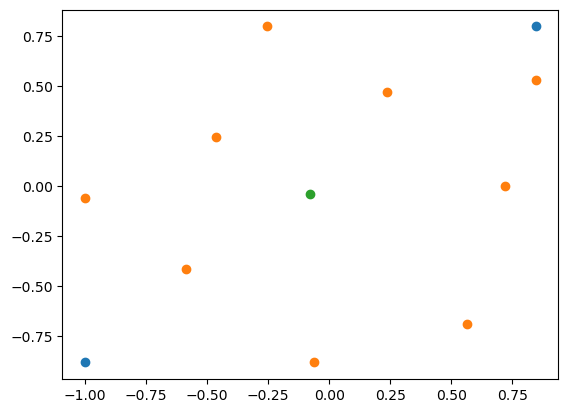

In [216]:
x, y = zip(*pos_list)
x_box,y_box = zip(*bounding_box(pos_list))
# bounding circle midpoint
midpt = ((x_box[0]+x_box[1])/2, (y_box[0]+y_box[1])/2)
# bounding box size (use to get a radius for the bounding circle)
dist = (math.dist(bounding_box(pos_list)[0],bounding_box(pos_list)[1]))
r = dist/2
# Get the filtration starting point on the bounding circle, which is normal to the filtration direction given by theta
start_pt = (midpt[0]+ r*omega[0], midpt[1]+ r*omega[1])


plt.scatter(x_box,y_box)
plt.scatter(x,y)
plt.scatter(midpt[0], midpt[1])

In [840]:
thresh_idx = 4
T = (midpt[0]+ r_threshes[thresh_idx]*omega[0], midpt[1]+ r_threshes[thresh_idx]*omega[1])
B = math.dist(T,midpt)
theta_b = np.arccos(B/r)
theta_c = theta - theta_b
if thresh_idx < .5*numThresh:
    x1 = midpt[0] + (r * np.cos(theta_b + theta))
    y1 = midpt[1] + (r * np.sin(theta_b + theta))

    x2 = midpt[0] + (r * np.cos(theta_c))
    y2 = midpt[1] + (r * np.sin(theta_c))
else:
    x1 = midpt[0] + (r * np.cos(np.pi + theta_b + theta))
    y1 = midpt[1] + (r * np.sin(np.pi +theta_b + theta))

    x2 = midpt[0] + (r * np.cos(np.pi +theta_c))
    y2 = midpt[1] + (r * np.sin(np.pi +theta_c))

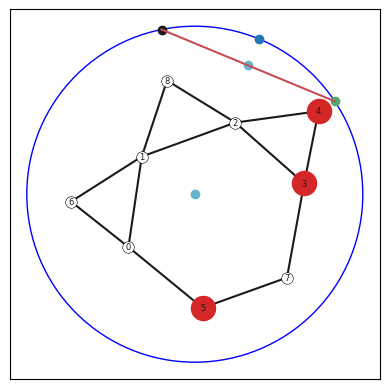

In [841]:
circle2 = plt.Circle(midpt, dist/2, color='blue', fill=False)
fig2, ax2 = plt.subplots() 
ax2.autoscale()
ax2.set_aspect('equal')
ax2.add_patch(circle2)
ax2.grid(False)
plt.scatter(start_pt[0],start_pt[1])
options = {
    "font_size": 6,
    "node_size": 70,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.4,
    "width": 1.5,
}
nx.draw_networkx(G, pos, **options)
nx.draw_networkx_nodes(G, pos, nodelist=[5,4,3],node_color="tab:red")
#nx.draw_networkx_edges(G, pos, edgelist=edges9,edge_color="tab:red",width=3)



plt.plot((x1,x2), (y1,y2), color='r')
plt.scatter(midpt[0],midpt[1], color='c')
plt.scatter(T[0],T[1], color='c')
plt.scatter(x1,y1, color='k')
plt.scatter(x2,y2, color='g')

#plt.savefig('figures/leaf_graph_direction.png', bbox_inches = 'tight')

In [154]:
v_list= [5, 4, 3, 9, 8, 2, 6, 1, 7]

In [163]:
edges1 = []
edges2 = [(4,5)]
edges3 = edges2 + [(3,5),(3,4)]
edges4 = edges3 + [(9,3)]
edges5 = edges4 + [(4,8)]
edges6 = edges5 + [(2,9),(2,3)]
edges7 = edges6 + [(6,8)]
edges8 = edges7 + [(1,2),(1,6)]
edges9 = edges8+[(7,2),(7,1)]
edge_dict = {
  "edges1": edges1,
  "edges2": edges2,
  "edges3": edges3,
  "edges4": edges4,
    "edges5": edges5,
    "edges6": edges6,
    "edges7": edges7,
    "edges8": edges8,
    "edges9": edges9
}

# Rotation tests

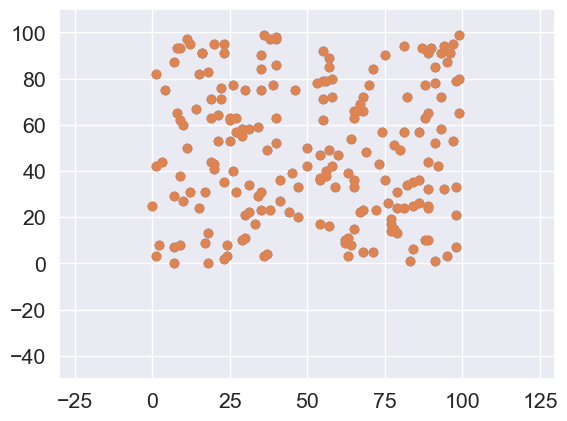

In [473]:
def rotateMatrix(a):
    return np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])

xy=np.random.randint(0,100, (200,2))

fig=plt.figure()
plt.plot(xy[:,0], xy[:,1], 'o')
plt.xlim(-30,130)
plt.ylim(-50,110)

plotdata,=plt.plot(xy[:,0], xy[:,1],'o')

x0=20
y0=50

def anim(i):
    newxy=(xy-[x0,y0]) @ rotateMatrix(-2*i*np.pi/180) + [x0,y0]
    plotdata.set_data(newxy[:,0], newxy[:,1])
    return [plotdata]

theAnim=animation.FuncAnimation(fig, anim, interval=40, blit=False, frames=360, repeat=False)
#theAnim.save('rotate.nosync.gif')
plt.show()

In [510]:
xy=np.random.randint(0,100, (200,2))

In [511]:
xy

array([[66, 39],
       [76, 53],
       [18, 32],
       [54, 17],
       [68,  8],
       [79, 59],
       [98, 49],
       [45, 42],
       [79, 74],
       [29, 89],
       [13, 81],
       [72, 37],
       [78, 12],
       [40, 64],
       [54, 69],
       [10,  3],
       [32,  3],
       [37, 25],
       [24, 89],
       [36, 55],
       [79, 84],
       [67, 83],
       [11, 83],
       [ 3, 31],
       [17, 44],
       [73, 35],
       [79, 62],
       [12, 28],
       [58, 57],
       [46, 23],
       [72, 81],
       [99,  6],
       [93, 85],
       [32, 32],
       [50, 70],
       [23, 86],
       [79, 58],
       [20, 86],
       [39, 47],
       [17,  2],
       [81, 95],
       [43, 46],
       [43, 14],
       [27, 46],
       [ 6,  7],
       [41, 21],
       [29, 12],
       [32, 70],
       [49, 30],
       [28, 98],
       [46, 59],
       [77, 58],
       [32,  8],
       [86, 22],
       [34, 43],
       [ 8, 19],
       [ 5, 76],
       [64, 41],
       [10, 71

{1: (-36.97526608, 301.2052718), 2: (-43.95129738, 286.5555837), 3: (-46.1972016, 241.8628862), 4: (-3.236105248, 238.5664717), 5: (2.685686852, 277.2012166), 6: (-2.022668314, 295.8909082), 7: (-550.3659191, 242.3836705), 8: (-617.0650305, 208.3121983), 9: (-975.6482014, -454.5994939), 10: (-246.1634363, -178.2577035), 11: (38.86046289, -1213.595057), 12: (244.6567632, -232.0998074), 13: (1005.970846, -394.6039424), 14: (656.6580412, 177.6707677), 15: (572.7933253, 203.5070299)}


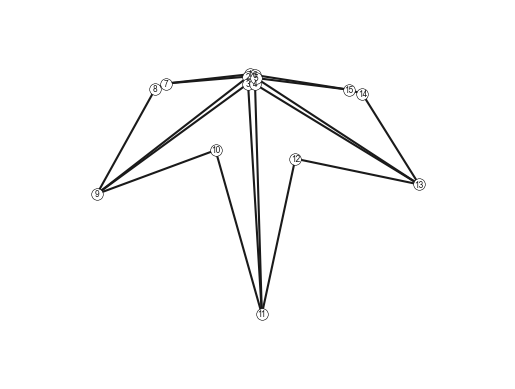

In [498]:
print(pos)
options = {
    "font_size": 6,
    "node_size": 70,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.4,
    "width": 1.5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [506]:
midpt

(15.161322300000052, -456.1948926)

In [524]:
pos_array = np.zeros_like(pos_list)
for i in range(len(pos_list)):
    pt = np.array(pos_list[i])
    pos_array[i]=pt

In [614]:
pos_r = {}
for k in pos:
    print(k)
    pos_r[k] = (pos_array[k-1]- midpt) @ rotateMatrix(-2*20*np.pi/180)+midpt 
#newxy=(xy-[x0,y0]) @ rotateMatrix(-2*i*np.pi/180) + [x0,y0]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


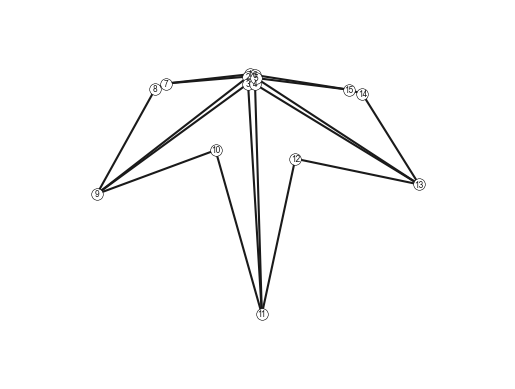

In [616]:
options = {
    "font_size": 6,
    "node_size": 70,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.4,
    "width": 1.5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


In [608]:
# Select directions around the circle
numCircleDirs = 32
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)
circledirs

print(circledirs/np.pi)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
 1.875  1.9375]


In [609]:
# Choose number of thresholds for the ECC
numThresh = 48

ECT_preprocess = {}

for i, angle in enumerate(circledirs):

    outECC = ECC(G, pos_r, theta=angle, numThresh = numThresh)
    
    ECT_preprocess[i] = (angle,outECC)
    

v_list [14, 15, 13, 6, 5, 1, 4, 2, 3, 12, 7, 10, 8, 11, 9]
v_list [14, 15, 13, 6, 5, 1, 2, 4, 3, 12, 7, 8, 10, 11, 9]
v_list [14, 15, 6, 1, 5, 2, 4, 3, 13, 7, 12, 8, 10, 9, 11]
v_list [15, 14, 6, 1, 5, 2, 4, 3, 7, 8, 13, 12, 10, 9, 11]
v_list [1, 6, 2, 5, 15, 4, 3, 14, 7, 8, 10, 12, 13, 9, 11]
v_list [1, 7, 6, 2, 5, 8, 3, 4, 15, 14, 10, 12, 9, 13, 11]
v_list [7, 8, 1, 2, 6, 5, 3, 4, 15, 14, 10, 9, 12, 13, 11]
v_list [8, 7, 1, 2, 6, 5, 3, 4, 9, 10, 15, 14, 12, 13, 11]
v_list [8, 7, 9, 1, 2, 6, 3, 5, 4, 10, 15, 14, 12, 13, 11]
v_list [8, 7, 9, 1, 2, 3, 6, 5, 4, 10, 15, 12, 14, 11, 13]
v_list [9, 8, 7, 1, 2, 3, 6, 10, 5, 4, 12, 15, 14, 11, 13]
v_list [9, 8, 7, 10, 2, 1, 3, 6, 5, 4, 12, 11, 15, 14, 13]
v_list [9, 8, 7, 10, 2, 3, 1, 6, 4, 5, 11, 12, 15, 14, 13]
v_list [9, 8, 7, 10, 11, 3, 2, 1, 4, 6, 5, 12, 15, 14, 13]
v_list [9, 8, 7, 11, 10, 3, 2, 1, 4, 5, 6, 12, 15, 14, 13]
v_list [9, 11, 8, 7, 10, 3, 2, 12, 4, 1, 5, 6, 15, 14, 13]
v_list [9, 11, 8, 10, 7, 12, 3, 2, 4, 1, 5, 6, 13, 15, 1

In [610]:
# Making a matrix of size numThresh x numCircleDirs
# M[i,j] = 
M = np.empty([numThresh,numCircleDirs])
for j in range(M.shape[1]):
    M[:,j] = ECT_preprocess[j][1]

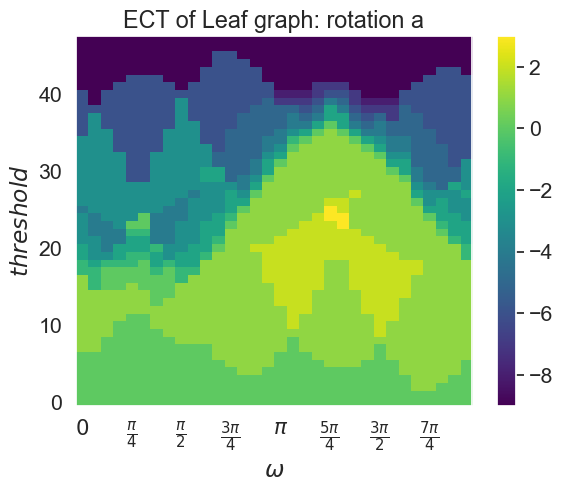

In [611]:
plt.imshow(M, cmap = 'viridis', aspect='auto')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))
ax.autoscale() 

labels = [r'$0$',
          r'$\frac{\pi}{4}$',
          r'$\frac{\pi}{2}$',
          r'$\frac{3\pi}{4}$',
          r'$\pi$',
          r'$\frac{5\pi}{4}$',
          r'$\frac{3\pi}{2}$',
          r'$\frac{7\pi}{4}$',
          r'$2\pi$',
         ]
ax.invert_yaxis()
ax.set_xticklabels(labels)
ax.grid(False)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$threshold$')

plt.title(r'ECT of Leaf graph: rotation a')

plt.savefig('figures/leaf_graph/Leaf_rotationD_ECT_nogrid.png', bbox_inches = 'tight', dpi=300)

## Stability

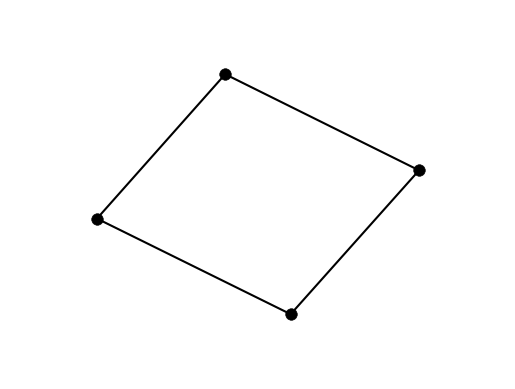

In [118]:
%matplotlib inline
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 0)

pos = nx.spring_layout(G)

options = {
    "font_size": 6,
    "node_size": 70,
    "node_color": "black",
    "edgecolors": "black",
    "linewidths": 0.4,
    "width": 1.5,
}
nx.draw_networkx(G,pos, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [119]:
G2 = nx.Graph()
G2.add_edge(0, 1)
G2.add_edge(1, 2)
G2.add_edge(2, 3)
G2.add_edge(3, 0)
G2.add_node(4)
pos2 = dict(pos)
pos2[4] = np.array([0.85,  0.5])

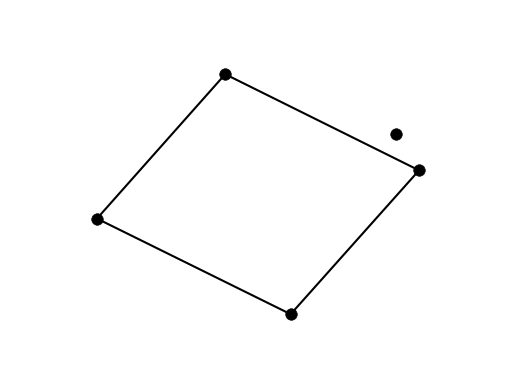

In [120]:
nx.draw_networkx(G2,pos2, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [121]:
# list of vertices and vertex positions
v_list = list(pos.keys())
pos_list = list(pos.values())
v_pos_list = list(pos.values())

In [122]:
# function g 
def g(v): 
    return np.dot(v_pos_list[v],omega)

# sort the v_list using g(v)
v_list.sort(key=g, reverse= True) 
print(v_list)

# save function values for later
g_v = []
for v in v_list:
    g_v.append(g(v))
print(g_v)

[0, 3, 1, 2]
[0.9931357590756386, 0.20210712921160617, -0.20165486893225149, -0.9935880193549935]


[0.  0.5 1.  1.5]
v_list [3, 2, 0, 1]
v_list [0, 3, 1, 2]
v_list [1, 0, 2, 3]
v_list [2, 1, 3, 0]


Text(0.5, 1.0, 'ECT of graph')

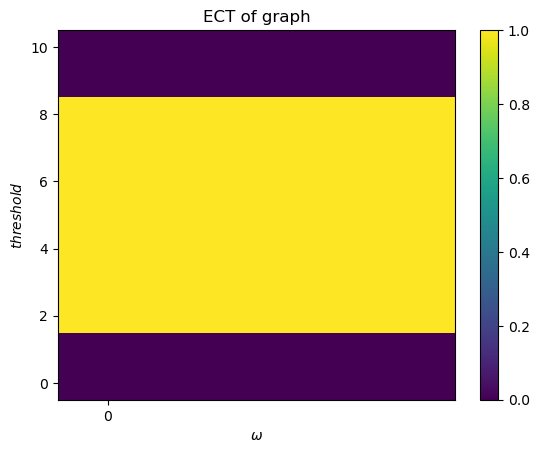

In [123]:
# Select directions around the circle
numCircleDirs = 4
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)
print(circledirs/np.pi)

# Choose number of thresholds for the ECC
numThresh = 11

ECT_preprocess = {}

for i, angle in enumerate(circledirs):

    outECC = ECC(G, pos, theta=angle, numThresh = numThresh)
    
    ECT_preprocess[i] = (angle,outECC)



# Making a matrix of size numThresh x numCircleDirs
# M[i,j] = 
M = np.empty([numThresh,numCircleDirs])
for j in range(M.shape[1]):
    M[:,j] = ECT_preprocess[j][1]



plt.imshow(M, cmap = 'viridis', aspect='auto')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))
ax.autoscale() 


ax.invert_yaxis()
ax.grid(False)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$threshold$')

plt.title(r'ECT of graph')

#plt.savefig('figures/crown_graph/crown_graph_ECT.png', bbox_inches = 'tight', dpi=300)

In [124]:
ticks = np.linspace(-1,1,11)
ticks

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

Text(0.5, 1.0, 'ECC of graph A, $\\omega = \\pi$')

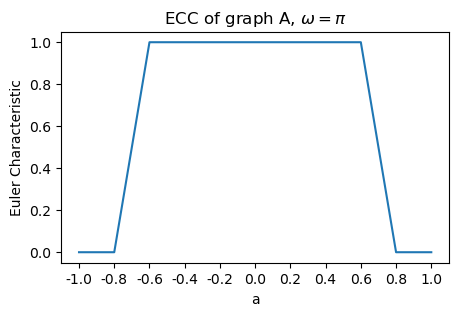

In [125]:
plt.style.use('default')
angle = 1*np.pi
omega = (np.cos(angle), np.sin(angle))
M_1dir = M[:,np.where(circledirs==angle)].flatten()
plt.figure(figsize=(5,3))
plt.plot(ticks,M_1dir)

ax = plt.gca()
plt.xlabel(r'a')
ax.set_xticks(ticks)
ax.set_xticklabels([f'{x:1.1f}' for x in ticks])
#[f'\\${x:1.2f}' for x in xticks]
plt.ylabel(r'Euler Characteristic')

plt.title(r'ECC of graph A, $\omega = \pi$')

#plt.savefig('figures/crown_graph/crown_graph_ECC', bbox_inches = 'tight', dpi=300)

[0, 3, 1, 4, 2]
[0.9931357590756386, 0.20210712921160617, -0.20165486893225149, -0.8499999999999999, -0.9935880193549935]
[0.  0.5 1.  1.5]
v_list [3, 0, 2, 4, 1]
v_list [4, 0, 3, 1, 2]
v_list [1, 4, 2, 0, 3]
v_list [2, 1, 3, 0, 4]


Text(0.5, 1.0, 'ECT of graph')

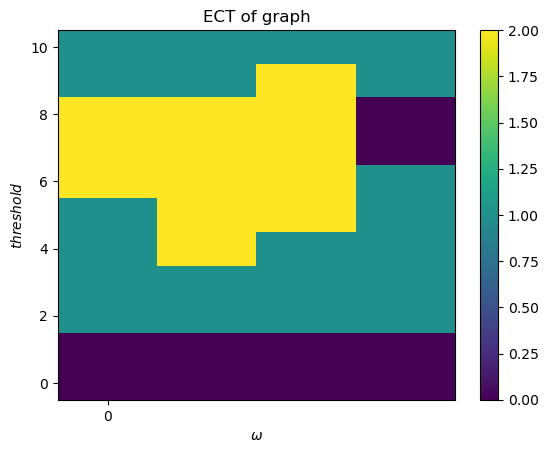

In [126]:
# list of vertices and vertex positions
v_list = list(pos2.keys())
v_pos_list = list(pos2.values())

# sort the v_list using g(v)
v_list.sort(key=g, reverse= True) 
print(v_list)

# save function values for later
g_v = []
for v in v_list:
    g_v.append(g(v))
print(g_v)

# Select directions around the circle
numCircleDirs = 4
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)
print(circledirs/np.pi)

# Choose number of thresholds for the ECC
numThresh = 11

ECT_preprocess = {}

for i, angle in enumerate(circledirs):

    outECC = ECC(G2, pos2, theta=angle, numThresh = numThresh)
    
    ECT_preprocess[i] = (angle,outECC)



# Making a matrix of size numThresh x numCircleDirs
# M[i,j] = 
M = np.empty([numThresh,numCircleDirs])
for j in range(M.shape[1]):
    M[:,j] = ECT_preprocess[j][1]



plt.imshow(M, cmap = 'viridis', aspect='auto')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))
ax.autoscale() 


ax.invert_yaxis()
ax.grid(False)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$threshold$')

plt.title(r'ECT of graph')

Text(0.5, 1.0, 'ECC of graph B, $\\omega = \\pi$')

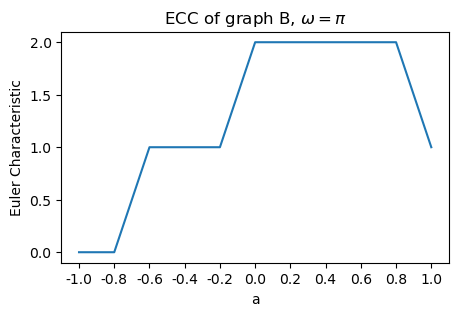

In [127]:
#plt.savefig('figures/crown_graph/crown_graph_ECT.png', bbox_inches = 'tight', dpi=300)



plt.style.use('default')
angle = 1*np.pi
omega = (np.cos(angle), np.sin(angle))
M_1dirB = M[:,np.where(circledirs==angle)].flatten()
plt.figure(figsize=(5,3))
plt.plot(ticks,M_1dirB)

ax = plt.gca()
plt.xlabel(r'a')
ax.set_xticks(ticks)
ax.set_xticklabels([f'{x:1.1f}' for x in ticks])
#[f'\\${x:1.2f}' for x in xticks]
plt.ylabel(r'Euler Characteristic')

plt.title(r'ECC of graph B, $\omega = \pi$')

#plt.savefig('figures/crown_graph/crown_graph_ECC', bbox_inches = 'tight', dpi=300)

In [128]:
import matplotlib

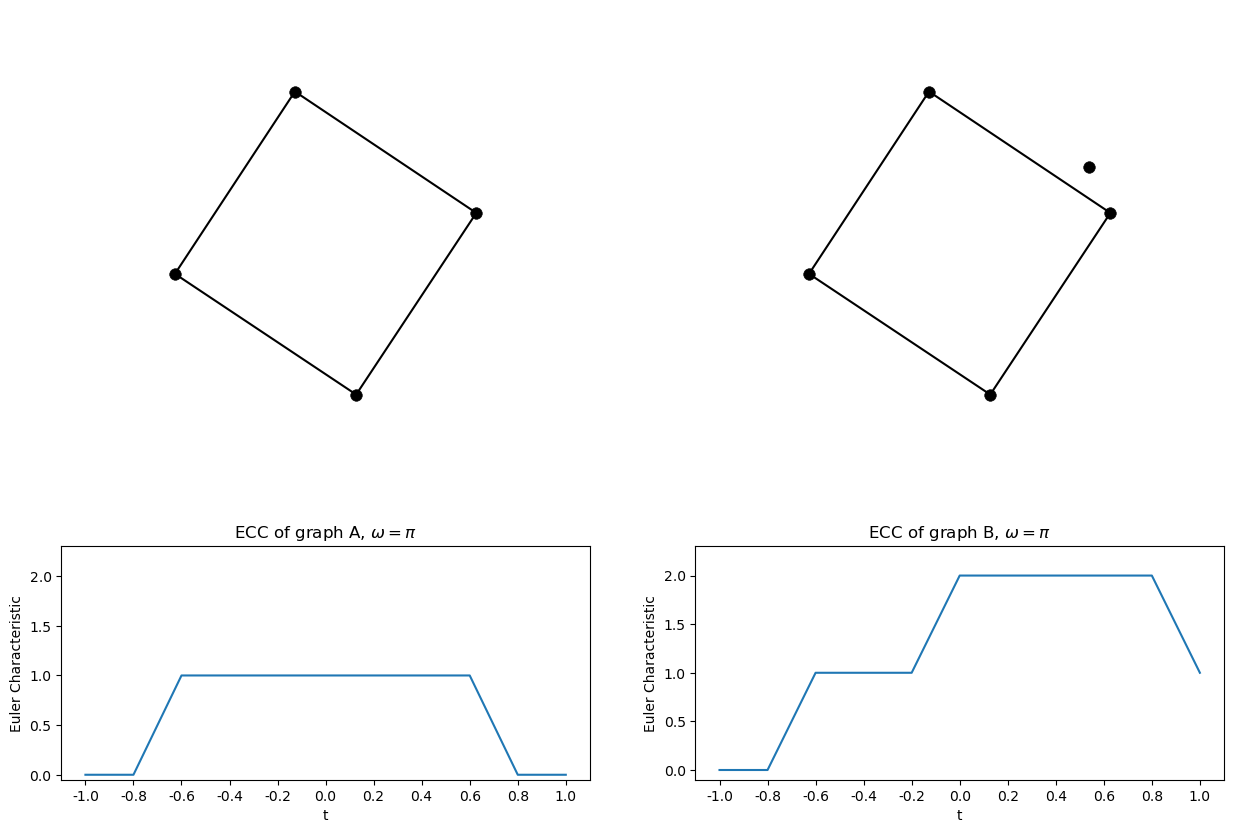

In [132]:
fig = plt.figure(figsize=(15,10))
gs = matplotlib.gridspec.GridSpec(2,2,height_ratios=[2,1])
plt.style.use('default')

    
    
ax1 = fig.add_subplot(gs[0,0])
im = nx.draw_networkx(G,pos, **options, ax=ax1)
ax1 = plt.gca()
ax1.margins(0.20)
ax1.set_axis_off()
ax1.set_aspect('equal')

ax2 = fig.add_subplot(gs[0,1])
im = nx.draw_networkx(G2,pos2, **options, ax=ax2)
ax2 = plt.gca()
ax2.margins(0.20)
ax2.set_axis_off()
ax2.set_aspect('equal')
    

ax3 = fig.add_subplot(gs[1,0])
ax3.plot(ticks,M_1dir)
ax3.set_ylim(top=2.3)
ax3 = plt.gca()
ax3.set_xlabel(r't')
ax3.set_xticks(ticks)
ax3.set_xticklabels([f'{x:1.1f}' for x in ticks])
ax3.set_ylabel(r'Euler Characteristic')
ax3.set_title(r'ECC of graph A, $\omega = \pi$')

ax4 = fig.add_subplot(gs[1,1])
ax4.plot(ticks,M_1dirB)
ax4.set_ylim(top=2.3)
ax4 = plt.gca()
ax4.set_xlabel(r't')
ax4.set_xticks(ticks)
ax4.set_xticklabels([f'{x:1.1f}' for x in ticks])
ax4.set_ylabel(r'Euler Characteristic')

ax4.set_title(r'ECC of graph B, $\omega = \pi$')


plt.savefig('figures/ECCstability.png', dpi=1000, bbox_inches='tight')

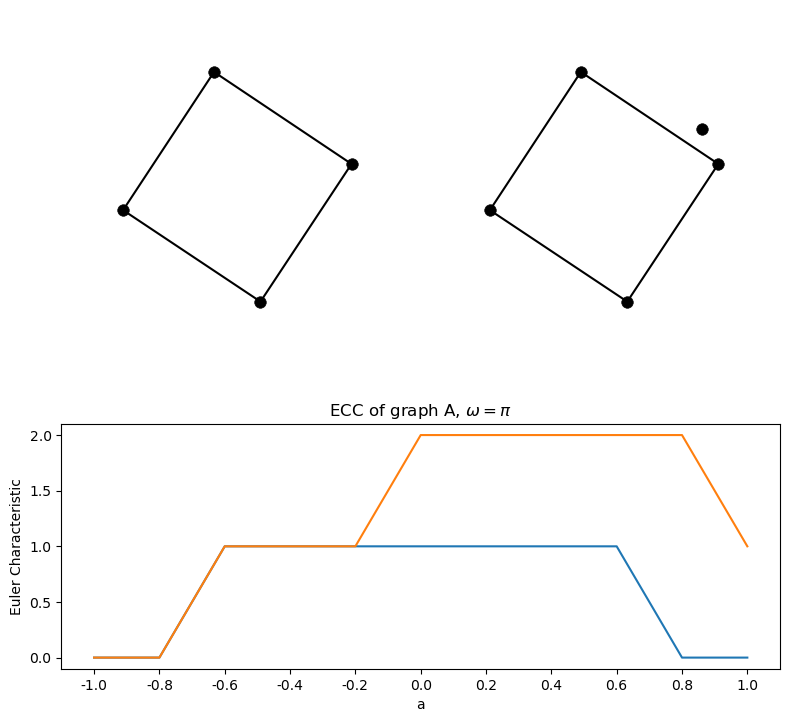

In [133]:
fig = plt.figure(figsize=(8,8))
gs = matplotlib.gridspec.GridSpec(2,2,height_ratios=[2,1])
plt.style.use('default')

    
ax1 = fig.add_subplot(gs[0,0])
im = nx.draw_networkx(G,pos, **options, ax=ax1)
ax1 = plt.gca()
ax1.margins(0.20)
ax1.set_axis_off()
ax1.set_aspect('equal')

ax2 = fig.add_subplot(gs[0,1])
im = nx.draw_networkx(G2,pos2, **options, ax=ax2)
ax2 = plt.gca()
ax2.margins(0.20)
ax2.set_axis_off()
ax2.set_aspect('equal')
    

ax3 = fig.add_subplot(gs[1,:])
ax3.plot(ticks,M_1dir)
ax3.plot(ticks,M_1dirB)
ax3 = plt.gca()
ax3.set_xlabel(r'a')
ax3.set_xticks(ticks)
ax3.set_xticklabels([f'{x:1.1f}' for x in ticks])
ax3.set_ylabel(r'Euler Characteristic')
ax3.set_title(r'ECC of graph A, $\omega = \pi$')

plt.tight_layout()
#plt.savefig('figures/ECCstability.png', dpi=1000, bbox_inches='tight')